#Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from random import sample
from scipy.stats import norm
import seaborn as sns
import collections
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_classification
from scipy.stats import mode
from sklearn import svm
import sys
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from scipy import stats
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.metrics import roc_curve, auc

In [ ]:
df = pd.read_csv('bank-additional-full.csv')

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [ ]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

#Exploratory Data Analysis

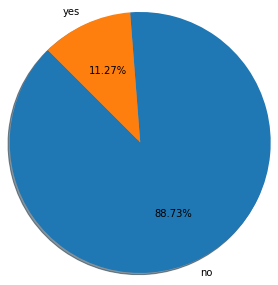

In [ ]:
#Percentage of clients that subscribed for the scheme

labels = 'no','yes'
df1 = df['y'].value_counts()
data = df1.tolist()
plt.pie(data,labels=labels,radius = 1.5,shadow = True,autopct = "%0.2f%%",startangle = 135)
plt.show()

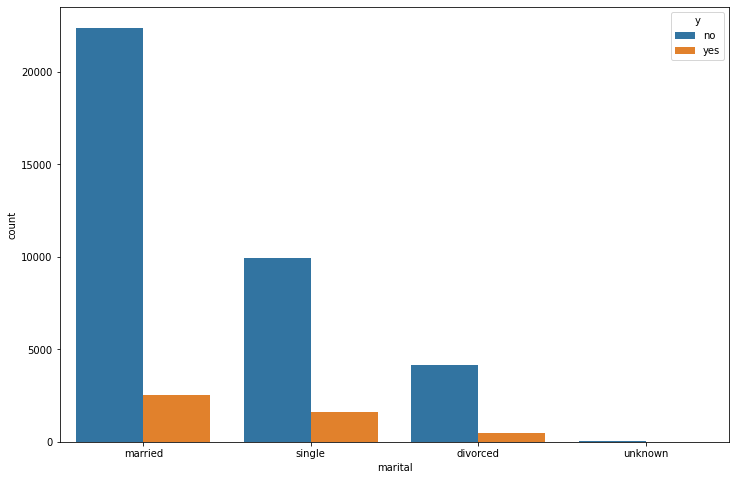

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x="marital", data=df,hue='y')

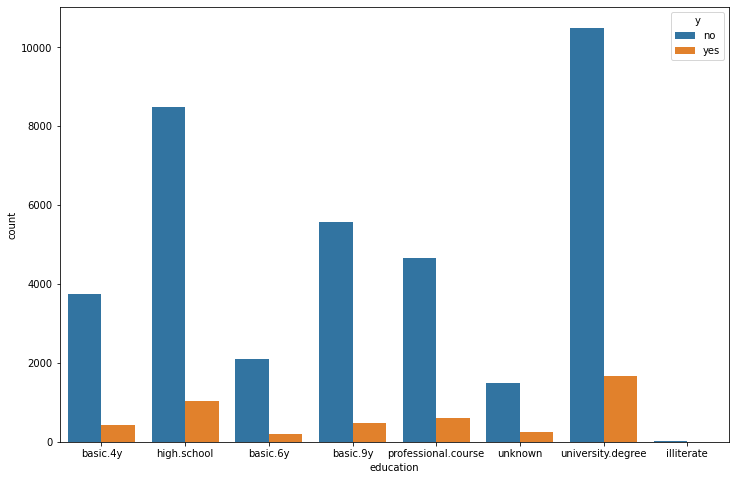

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x="education", data=df,hue='y')

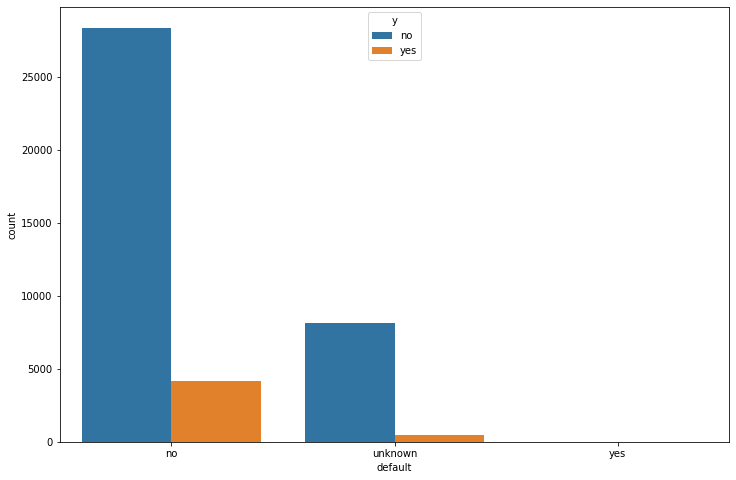

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x="default", data=df,hue='y')

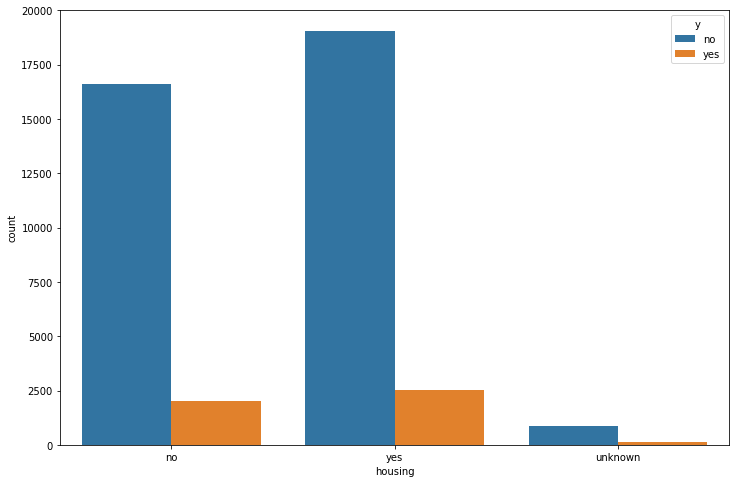

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x="housing", data=df,hue='y')

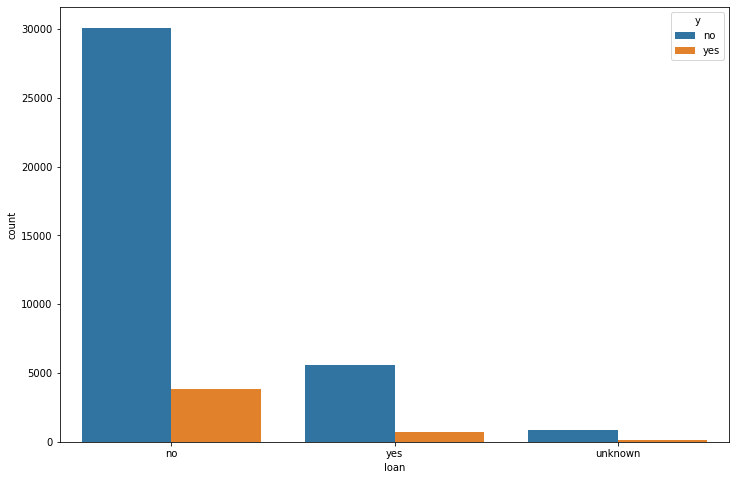

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x="loan", data=df,hue='y')

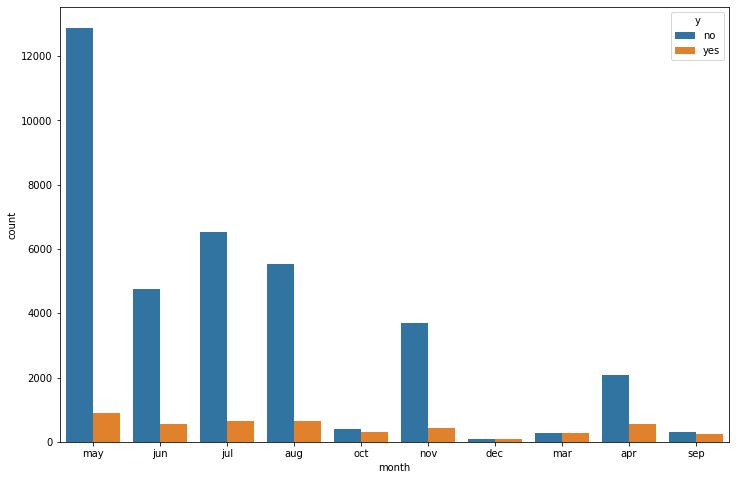

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x="month", data=df,hue='y')

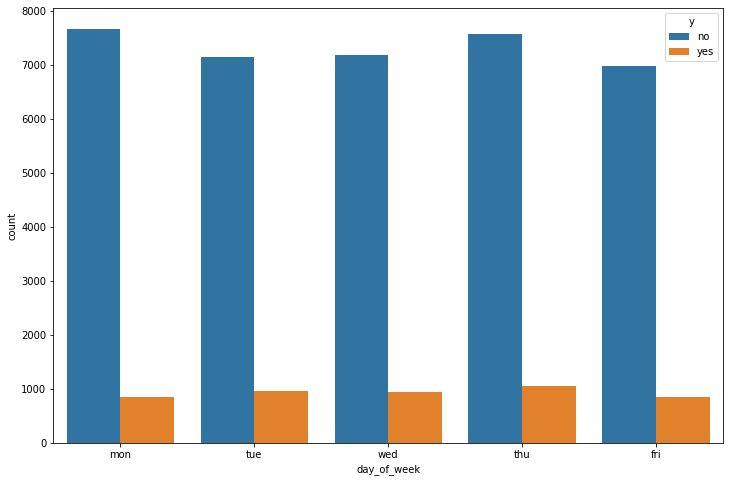

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x="day_of_week", data=df,hue='y')

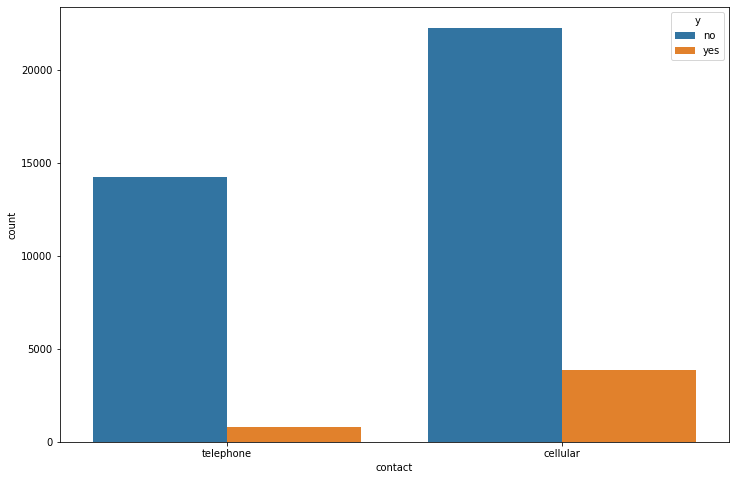

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x="contact", data=df,hue='y')

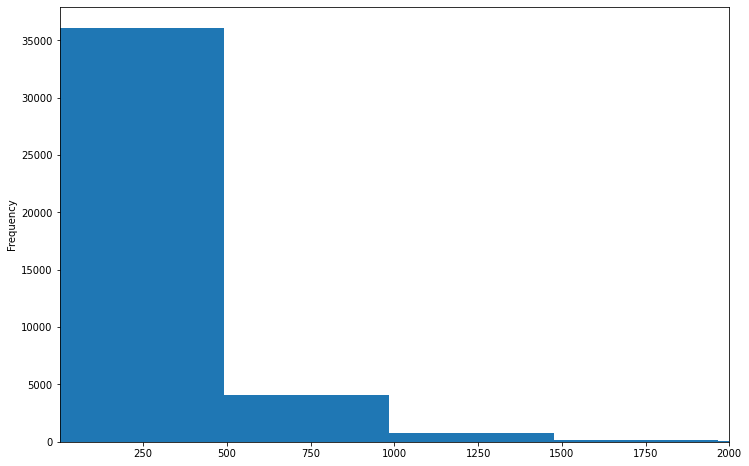

In [ ]:
plt.figure(figsize=(12,8))
df['duration'].plot(kind='hist', xlim = (1,2000))
plt.show()

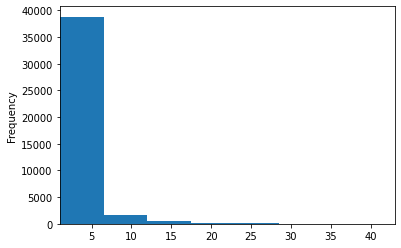

In [ ]:
df['campaign'].plot(kind='hist', xlim = (1,43))

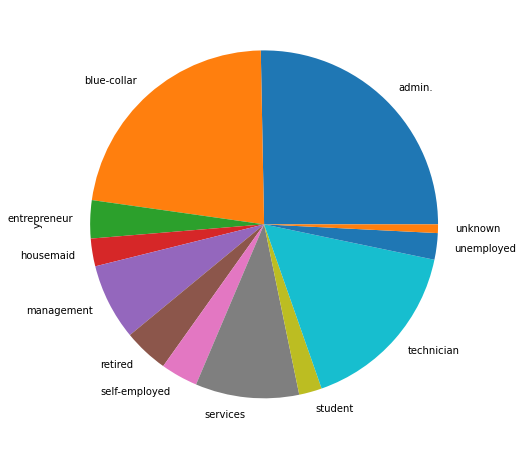

In [ ]:
df.groupby(by='job').count()['y'].plot(kind='pie',figsize=(8,8))
plt.show()

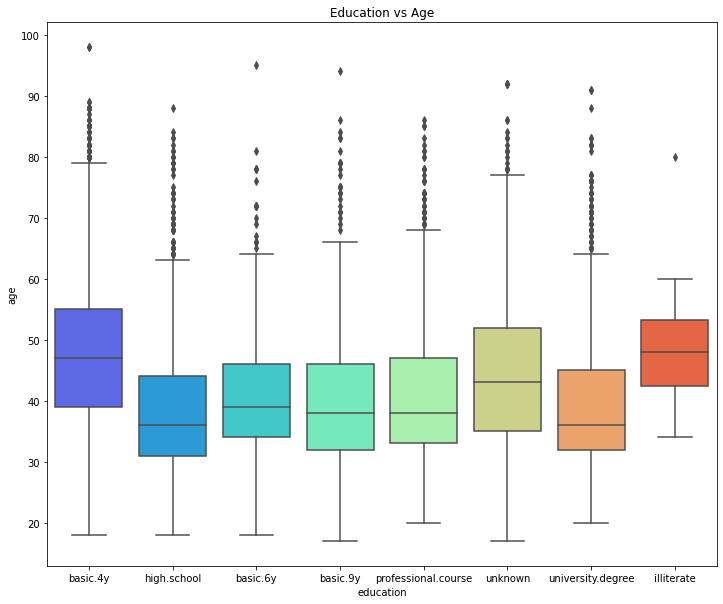

In [ ]:
plt.figure(figsize=(12,10))
sns.boxplot(x='education',y='age',data=df, palette='rainbow')
plt.title("Education vs Age")
plt.show()

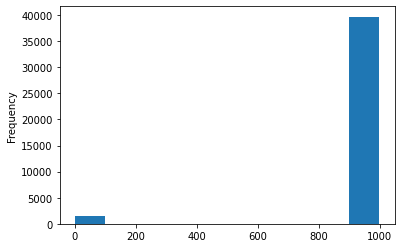

In [ ]:
df['pdays'].plot(kind='hist')

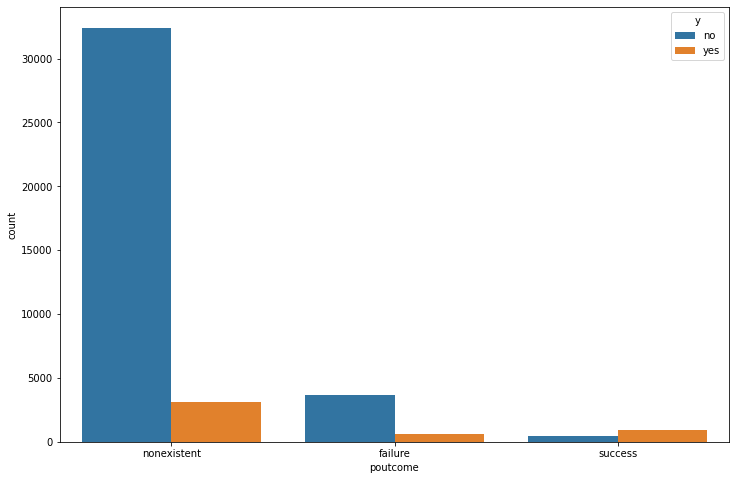

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x="poutcome", data=df,hue='y')

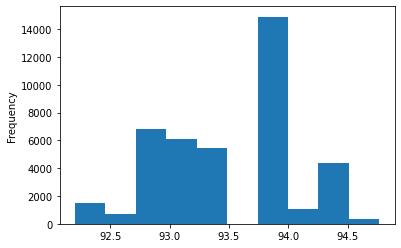

In [ ]:
df['cons.price.idx'].plot(kind='hist')

In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


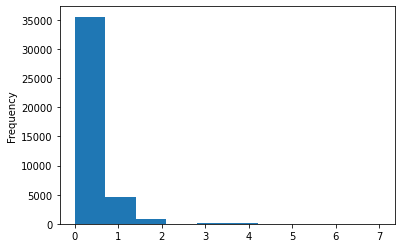

In [ ]:
df['previous'].plot(kind='hist')

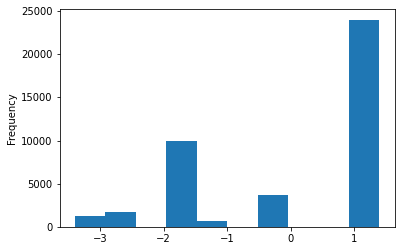

In [ ]:
df['emp.var.rate'].plot(kind='hist')

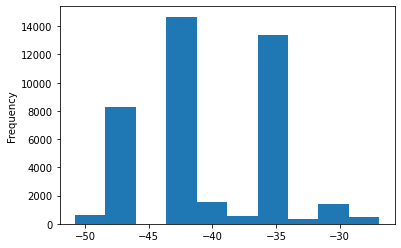

In [ ]:
df['cons.conf.idx'].plot(kind='hist')

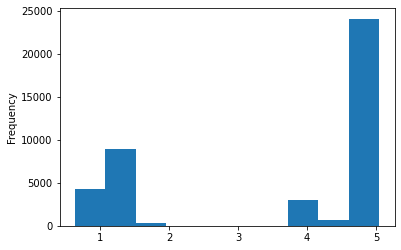

In [ ]:
df['euribor3m'].plot(kind='hist')

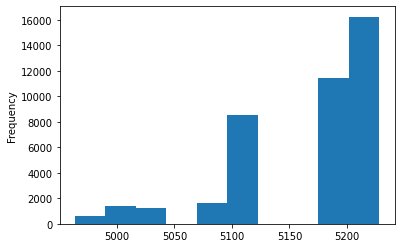

In [ ]:
df['nr.employed'].plot(kind='hist')

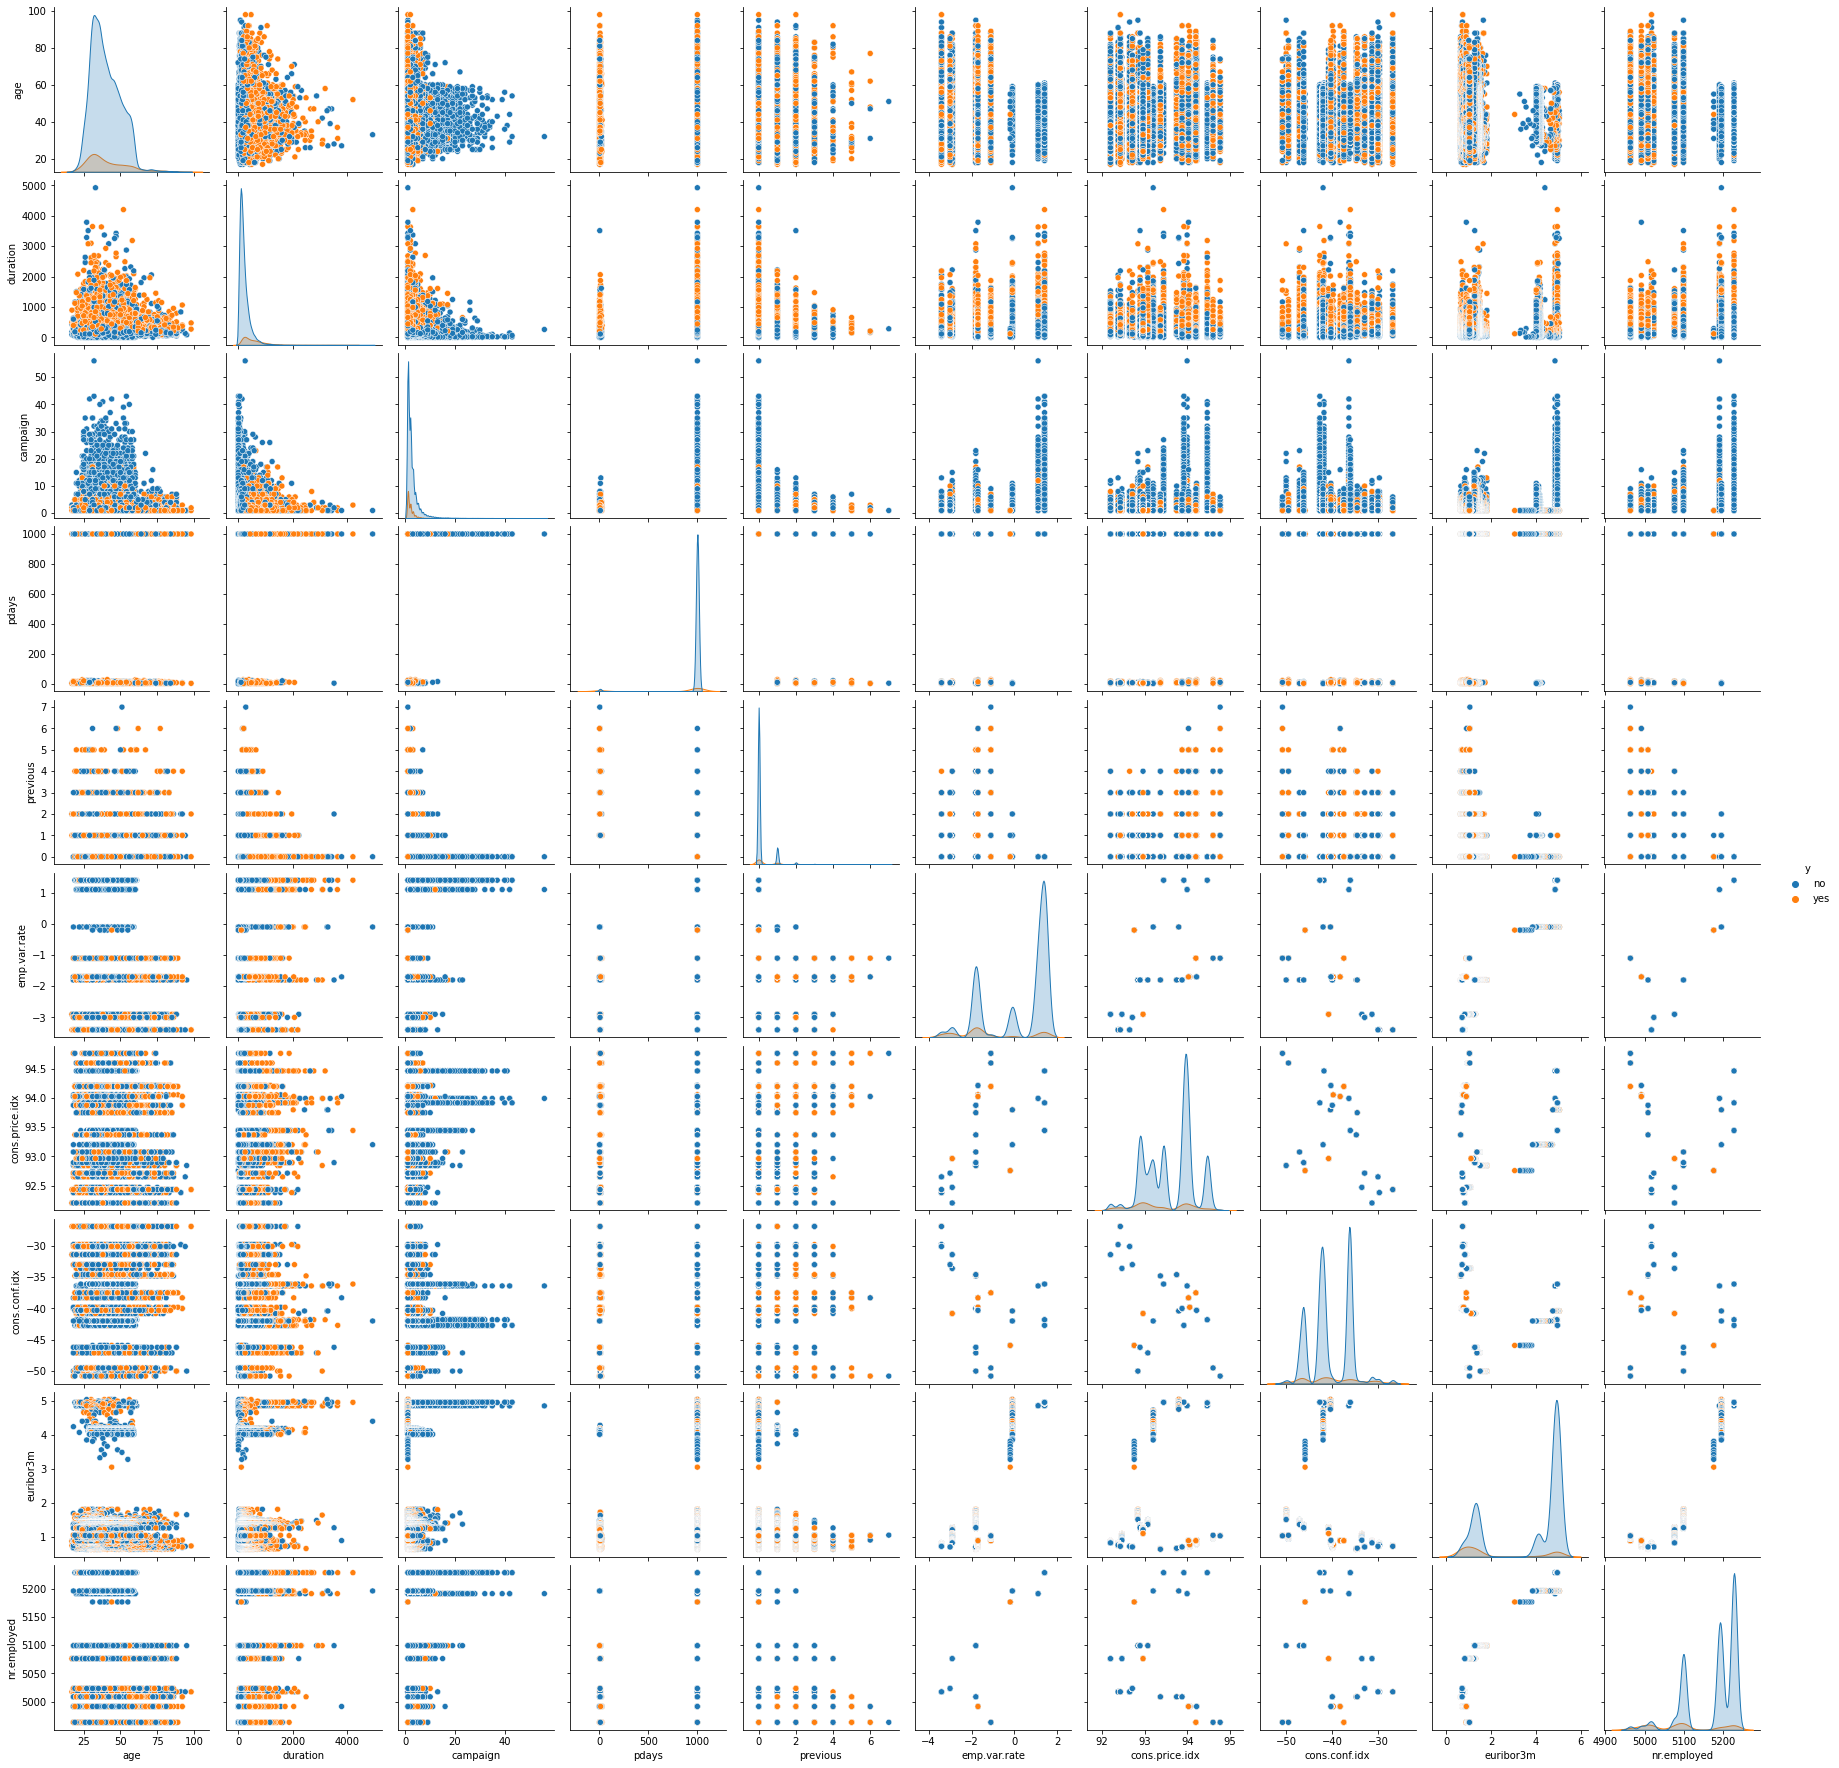

In [ ]:
sns.pairplot(data=df,hue='y')

##Correlation Plot


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


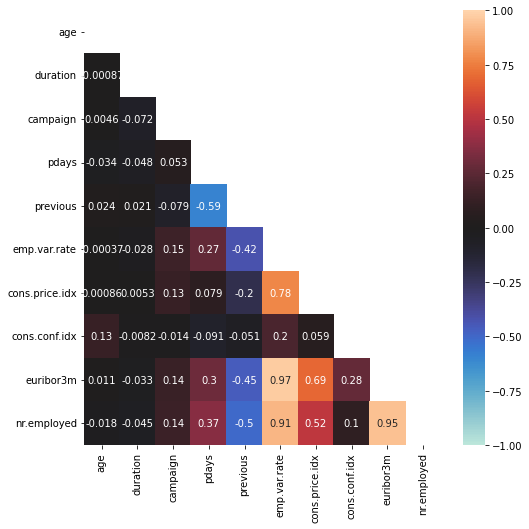

In [ ]:
plt.figure(figsize=(8,8))

mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1,annot=True, cmap='icefire')

In [ ]:
#Dropping col emp.var.rate since it is correlated to uribor3m and nr.employed

df.drop(['emp.var.rate'], axis = 1, inplace = True)

##Data Transformation

In [ ]:
df_marital = pd.get_dummies(df['marital'], drop_first = True)
df_marital.head()

,married,single,unknown
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [ ]:
df_marital.rename(columns = {'married' : 'marital_married', 'single' : 'marital_single', 'unknown' : 'marital_unknown'}, inplace = True)

In [ ]:
df_job = pd.get_dummies(df['job'], drop_first = True)
df_job.head()

,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
df_job.rename(columns = {'blue-collar' : 'job_blue_collar', 'entrepreneur' : 'job_entrepreneur', 'housemaid' : 'job_housemaid',
                         'management' : 'job_management', 'retired' : 'job_retired', 'self-employed' : 'job_self_employed',
                         'services' : 'job_services', 'student' : 'job_student', 'technician' : 'job_technician' ,
                         'unemployed' : 'job_unemployed', 'unknown' : 'job_unknown'}, inplace = True)

In [ ]:
df_education = pd.get_dummies(df['education'], drop_first = True)
df_education.head()

,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0


In [ ]:
df_education.rename(columns = {'basic.6y' : 'education_basic.6y', 'basic.9y' : 'education_basic.9y', 'high.school' : 'education_high.school'
                               ,'illiterate' : 'education_illiterate','professional.course' : 'education_professional.course',
                               'university.degree' : 'education_university.degre','unknown' : 'education_unknown'}, inplace = True)

In [ ]:
df_month = pd.get_dummies(df['month'], drop_first = True)
df_month.head()

,aug,dec,jul,jun,mar,may,nov,oct,sep
0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0


In [ ]:
df_month.rename(columns = {'aug' : 'month_aug', 'dec' : 'month_dec', 'jul' : 'month_jul'
                               ,'jun' : 'month_jun','mar' : 'month_mar', 'oct' : 'month_oct',
                               'may' : 'month_may','nov' : 'month_nov', 'sep' : 'month_sep'}, inplace = True)

In [ ]:
df_day_of_week = pd.get_dummies(df['day_of_week'], drop_first = True)
df_day_of_week.head()

,mon,thu,tue,wed
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [ ]:
df_day_of_week.rename(columns = {'mon' : 'day_of_week_mon', 'tue' : 'day_of_week_tue', 'wed' : 'day_of_week_wed'
                               ,'thu' : 'day_of_week_thu'}, inplace = True)

In [ ]:
df_contact = pd.get_dummies(df['contact'], drop_first = True)
df_contact.head()

,telephone
0,1
1,1
2,1
3,1
4,1


In [ ]:
df_contact.rename(columns = {'telephone' : 'contact_telephone'}, inplace = True)

In [ ]:
df_housing = pd.get_dummies(df['housing'], drop_first = True)
df_housing.head()

,unknown,yes
0,0,0
1,0,0
2,0,1
3,0,0
4,0,0


In [ ]:
df_housing.rename(columns = {'unknown' : 'housing_unknown', 'yes' : 'housing_yes'}, inplace = True)

In [ ]:
df_loan = pd.get_dummies(df['loan'], drop_first = True)
df_loan.head()

,unknown,yes
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [ ]:
df_loan.rename(columns = {'unknown' : 'loan_unknown', 'yes' : 'loan_yes'}, inplace = True)

In [ ]:
df_poutcome = pd.get_dummies(df['poutcome'], drop_first = True)
df_poutcome.head()

,nonexistent,success
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [ ]:
df_poutcome.rename(columns = {'nonexistent' : 'poutcome_nonexistent', 'success' : 'poutcome_success'}, inplace = True)

In [ ]:
df1 = df
df1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,93.994,-36.4,4.857,5191.0,no


In [ ]:
df_default = pd.get_dummies(df['poutcome'], drop_first = True)
df_default.head()

,nonexistent,success
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [ ]:
df_default.rename(columns = {'nonexistent' : 'default_nonexistent', 'success' : 'default_success'}, inplace = True)

In [ ]:
df_1 = pd.concat((df1, df_marital, df_job, df_education, df_month, df_loan, df_housing, df_day_of_week, df_contact, df_poutcome, df_default), axis = 1)

In [ ]:
df_1['target'] = df_1['y']
df_1.drop(columns = 'y',inplace=True)

In [ ]:
df_1.drop(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome','pdays'], axis = 1, inplace = True)

In [ ]:
df_1.target.replace(('yes', 'no'), (1, 0), inplace = True)

In [ ]:
df_1.head()

,age,duration,campaign,previous,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,marital_married,marital_single,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,contact_telephone,poutcome_nonexistent,poutcome_success,default_nonexistent,default_success,target
0,56,261,1,0,93.994,-36.4,4.857,5191.0,1,0,...,1,0,0,0,1,1,0,1,0,0
1,57,149,1,0,93.994,-36.4,4.857,5191.0,1,0,...,1,0,0,0,1,1,0,1,0,0
2,37,226,1,0,93.994,-36.4,4.857,5191.0,1,0,...,1,0,0,0,1,1,0,1,0,0
3,40,151,1,0,93.994,-36.4,4.857,5191.0,1,0,...,1,0,0,0,1,1,0,1,0,0
4,56,307,1,0,93.994,-36.4,4.857,5191.0,1,0,...,1,0,0,0,1,1,0,1,0,0


In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   previous                       41188 non-null  int64  
 4   cons.price.idx                 41188 non-null  float64
 5   cons.conf.idx                  41188 non-null  float64
 6   euribor3m                      41188 non-null  float64
 7   nr.employed                    41188 non-null  float64
 8   marital_married                41188 non-null  uint8  
 9   marital_single                 41188 non-null  uint8  
 10  marital_unknown                41188 non-null  uint8  
 11  job_blue_collar                41188 non-null  uint8  
 12  job_entrepreneur               41188 non-null 

In [ ]:
df_1.nunique()

age                                78
duration                         1544
campaign                           42
previous                            8
cons.price.idx                     26
cons.conf.idx                      26
euribor3m                         316
nr.employed                        11
marital_married                     2
marital_single                      2
marital_unknown                     2
job_blue_collar                     2
job_entrepreneur                    2
job_housemaid                       2
job_management                      2
job_retired                         2
job_self_employed                   2
job_services                        2
job_student                         2
job_technician                      2
job_unemployed                      2
job_unknown                         2
education_basic.6y                  2
education_basic.9y                  2
education_high.school               2
education_illiterate                2
education_pr

In [ ]:
df_1.isnull().sum()

age                              0
duration                         0
campaign                         0
previous                         0
cons.price.idx                   0
cons.conf.idx                    0
euribor3m                        0
nr.employed                      0
marital_married                  0
marital_single                   0
marital_unknown                  0
job_blue_collar                  0
job_entrepreneur                 0
job_housemaid                    0
job_management                   0
job_retired                      0
job_self_employed                0
job_services                     0
job_student                      0
job_technician                   0
job_unemployed                   0
job_unknown                      0
education_basic.6y               0
education_basic.9y               0
education_high.school            0
education_illiterate             0
education_professional.course    0
education_university.degre       0
education_unknown   

In [ ]:
X = df_1[df_1.columns[:-1]]
y = df_1[df_1.columns[-1]]

print(X)
print(y)

       age  duration  campaign  previous  cons.price.idx  cons.conf.idx  \
0       56       261         1         0          93.994          -36.4   
1       57       149         1         0          93.994          -36.4   
2       37       226         1         0          93.994          -36.4   
3       40       151         1         0          93.994          -36.4   
4       56       307         1         0          93.994          -36.4   
...    ...       ...       ...       ...             ...            ...   
41183   73       334         1         0          94.767          -50.8   
41184   46       383         1         0          94.767          -50.8   
41185   56       189         2         0          94.767          -50.8   
41186   44       442         1         0          94.767          -50.8   
41187   74       239         3         1          94.767          -50.8   

       euribor3m  nr.employed  marital_married  marital_single  ...  \
0          4.857       5191.

#Scaling

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

#Data Reduction

##PCA

In [ ]:
class PCA:
    def __init__(self,X):
        self.X=X

    def cum_explained_variance(X):

        num_components = X.shape[1]

        X_meaned = X - np.mean(X , axis = 0)

        cov_mat = np.cov(X_meaned , rowvar = False)

        eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

        sorted_index = np.argsort(eigen_values)[::-1]
        sorted_eigenvalue = eigen_values[sorted_index]
        explained_variance_ratio = [i/np.sum(eigen_values) for i in sorted_eigenvalue[:num_components]]
        cum_explained_variance = np.cumsum(explained_variance_ratio)
        return cum_explained_variance


    def fit(X,num_components):

        X_meaned = X - np.mean(X , axis = 0)

        cov_mat = np.cov(X_meaned , rowvar = False)

        eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

        sorted_index = np.argsort(eigen_values)[::-1]
        sorted_eigenvectors = eigen_vectors[:,sorted_index]

        eigenvector_subset = sorted_eigenvectors[:,0:num_components]
        X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
        principalDf = pd.DataFrame(data = X_reduced)
        principalDf.columns = ['PC{}'.format(i) for i in range (1, len(principalDf.columns)+1)]

        return principalDf

In [ ]:
cum_explained_variance = PCA.cum_explained_variance(X)
cum_explained_variance

array([0.09962917, 0.14664819, 0.1918979 , 0.23341466, 0.27325546,
       0.30709933, 0.33966217, 0.37186652, 0.40076897, 0.42840448,
       0.45325529, 0.47787416, 0.50224932, 0.52575963, 0.54873871,
       0.57052774, 0.59210246, 0.61312881, 0.63372156, 0.65415413,
       0.67449804, 0.6946802 , 0.71472511, 0.73460806, 0.75425449,
       0.77374867, 0.79315659, 0.812356  , 0.83103792, 0.84922107,
       0.8670624 , 0.88426678, 0.90096637, 0.91692183, 0.93123032,
       0.94517523, 0.95623557, 0.9655717 , 0.97256494, 0.97745909,
       0.9821651 , 0.98674254, 0.99067852, 0.99452972, 0.99702815,
       0.99881424, 0.99994399, 1.        , 1.        , 1.        ,
       1.        ])

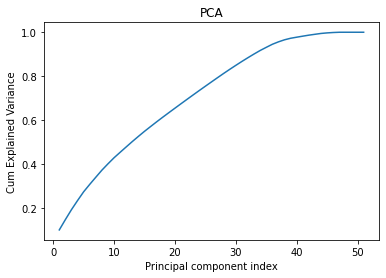

In [ ]:
plt.plot(list(range(1,X.shape[1]+1)),cum_explained_variance)
plt.title('PCA')
plt.xlabel('Principal component index')
plt.ylabel('Cum Explained Variance')
plt.show()

In [ ]:
X = PCA.fit(X,45)
X

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45
0,1.459335,2.068379,-0.848616,0.047438,-0.003330,-1.280002,-0.927524,0.437057,0.162460,0.341088,...,-0.084921,0.216568,0.401612,-0.003492,0.089790,-0.434444,0.101745,-0.338013,-0.015849,-0.005625
1,1.407526,1.655669,0.567409,-0.011044,0.225400,-1.626513,-1.685432,3.002765,0.634526,-0.585127,...,-0.309464,0.195648,1.278709,-0.134583,0.008989,-0.346679,0.009488,-0.437927,0.002317,-0.024011
2,1.350991,0.957439,1.129655,0.121208,0.619824,-1.606699,-1.474981,2.744594,0.636018,-1.018876,...,-0.539577,0.301957,-0.145666,-0.106115,-0.010494,-0.399078,0.058476,-0.061924,-0.084060,-0.039397
3,1.494974,1.946523,0.330515,0.314143,-0.025295,-1.264052,-0.275894,-0.474063,0.240996,-0.228356,...,-0.133723,-1.167005,-0.414072,-0.069262,-0.268074,0.721932,-0.994655,-0.404237,0.022451,-0.035450
4,1.393015,1.565503,0.600296,0.135939,0.455016,-1.589588,-1.696779,2.985302,0.597114,-0.580926,...,-0.237660,0.139161,1.202418,-0.136747,0.004861,-0.372641,0.014259,-0.404298,0.009763,-0.022849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,-1.207256,1.456729,-2.111871,1.971492,-0.852529,0.369735,0.589774,1.784909,1.603969,3.766948,...,-0.346841,1.321949,-0.438303,0.791737,-3.325302,0.566231,0.993747,-0.373861,-0.292399,-1.450155
41184,-0.732794,0.826172,0.365720,1.608798,-0.814381,0.821869,1.737505,-0.018623,1.704775,1.244356,...,-0.104394,2.419897,0.564806,0.430159,-3.503528,0.467906,1.076577,-0.047112,-0.314884,-1.495286
41185,-1.258525,0.716910,-1.597998,1.811048,-0.841862,1.092966,-1.627738,0.462925,1.167935,3.005832,...,-2.296022,0.287326,-1.279756,0.849421,-3.245560,0.028835,1.431051,0.100715,-0.422525,-1.482977
41186,-0.849255,-0.381396,-0.539910,0.833732,-0.654353,0.126736,2.432107,0.704112,3.035221,1.415583,...,-0.764033,0.109272,0.413197,0.385564,-3.474806,0.482249,1.040899,-0.083217,-0.318623,-1.487795


#Spliting the dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

#Smote

In [ ]:
Counter = collections.Counter(y_train)
print(Counter)

sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

Counter = collections.Counter(y_train_sm)
print(Counter)

train = pd.concat([y_train_sm,X_train_sm], axis=1)
test = pd.concat([y_test,X_test], axis=1)

print(train.shape,"\n")
print(Counter)

Counter({0: 25580, 1: 3251})
Counter({0: 25580, 1: 25580})
(51160, 46) 

Counter({0: 25580, 1: 25580})


##Graphical Representation after smote

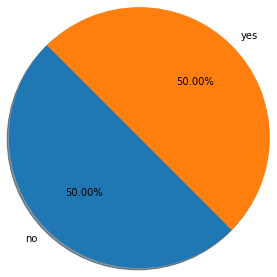

In [ ]:
labels = 'no','yes'
#df1 = df['y'].value_counts()
data_1 = list(Counter.values())
plt.pie(data_1,labels=labels,radius = 1.5,shadow = True,autopct = "%0.2f%%",startangle = 135)
plt.show()

#Model Building

In [ ]:
def confusion(true, pred):

    classes = np.unique(true)
    matrix = np.zeros((len(classes), len(classes)))
    for i in range(len(classes)):
        for j in range(len(classes)):
            matrix[i, j] = np.sum((true == classes[i]) & (pred == classes[j]))

    conf_df = pd.DataFrame(data=matrix,
                          index=["Actual "+str(classes[0]), "Actual "+str(classes[1])],
                          columns=["Predicted "+str(classes[0]), "Predicted "+str(classes[1])])
    return conf_df

def Eval(true, pred):

    _NUMERIC_KINDS = set('buifc')
    true = np.array(true)
    pred = np.array(pred)

    if(len(true) == len(pred)):


        if (not(true.dtype.kind in _NUMERIC_KINDS) or not(pred.dtype.kind in _NUMERIC_KINDS)):
            print("There is a non-numeric array instead of a numeric array.")

        else:
            true_unique = np.sort(np.unique(true))
            pred_unique = np.sort(np.unique(pred))


            if (np.array_equal(true_unique, pred_unique)):

                if(len(true_unique) == 2):


                    confusionMatrix = confusion(true, pred)
                    tp = confusionMatrix.iloc[1, 1]
                    tn = confusionMatrix.iloc[0, 0]
                    fp = confusionMatrix.iloc[0, 1]
                    fn = confusionMatrix.iloc[1, 0]

                    print("\nConfusion Matrix is as follows (class 1 is target class)\n", confusionMatrix)
                    print("\nAccuracy is ", round(((tp+tn)/(tn+fp+fn+tp))*100,2),"%")
                    print("Error is ", round((1-((tp+tn)/(tn+fp+fn+tp)))*100,2),"%")
                    print("Recall is ", round(((tp)/(fn+tp))*100,2),"%")
                    print("Precision is ", round(((tp)/(fp+tp))*100,2),"%")
                else:
                    print("Detected non-binary classification outcome")
            else:
                print("Different classification is present inside arrays.")
    else:
        print("Array length is not constant when calculating performance")

In [ ]:
train_df, test_df = np.array(train, dtype=np.float64), np.array(test, dtype=np.float64)
X_train, y_train= train_df[:,1:], train_df[:,0]
X_test, y_test= test_df[:,1:], test_df[:,0]

#Logistic Regression

In [ ]:
class LogisticRegression:
  def __init__(self, X, y, learningRate, tolerance, maxIteration) -> None:
    self.X = X
    self.y = y
    self.learningRate = learningRate
    self.tolerance = tolerance
    self.maxIteration = maxIteration


  def add_X0(self,X):
    return np.column_stack([np.ones([X.shape[0], 1]), X])

  def sigmoid(self,z):
    sig = 1 / (1 + np.exp(-z))
    return sig

  def costFunction(self, X, y):

    #approach 1
    sig = self.sigmoid(X.dot(self.w))
    pred = y * np.log(sig) + (1 - y) * np.log(1 - sig)
    cost = - pred.sum()

    #approach 2
    pred_ = np.log(np.ones(X.shape[0]) + np.exp(X.dot(self.w))) - X.dot(self.w).dot(y)
    cost_ = pred_.sum()

    return cost

  def gradient(self, X, y):
    sig = self.sigmoid(X.dot(self.w))
    grad = (sig - y).dot(X)
    return grad

  def gradientDescent(self, X, y):

    errors = []
    last_error = np.float('inf')

    for i in tqdm(range(self.maxIteration)):
      self.w = self.w - self.learningRate * self.gradient(X, y)
      currentError = self.costFunction(X, y)
      diff = last_error - currentError
      last_error = currentError
      errors.append(currentError)

      if np.abs(diff) < self.tolerance:
        print('Model stopped learning')
        break
    return

  def predict(self, X):
    sig = self.sigmoid(X.dot(self.w))

    return np.around(sig)

  def fit(self):

    print('Solving using gradient descent')
    self.w = np.ones(X.shape[1], dtype = np.float64) * 0
    self.gradientDescent(X, y)
    print(self.w)

    y_hat_train = self.predict(X)
    self.evaluate(y, y_hat_train)


  def evaluate(self, y, y_hat):
    y = (y == 1)
    y_hat = (y_hat == 1)

    accuracy = (y == y_hat).sum() / y.size
    precision = (y & y_hat).sum() / y_hat.sum()
    recall = (y & y_hat).sum() / y.sum()
    print('Accuracy is {}'.format(accuracy))
    print('Precision is {}'.format(precision))
    print('Recall is {}'.format(recall))


In [ ]:
lr1 = LogisticRegression(X_train, y_train, learningRate = 0.000001, tolerance = 0.0000005, maxIteration = 10000)
lr1.fit()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


Solving using gradient descent


 72%|███████▏  | 7168/10000 [03:18<01:18, 36.04it/s]

Model stopped learning
PC1    -0.426973
PC2     0.107242
PC3    -0.106104
PC4    -0.269830
PC5     0.192967
PC6     0.006773
PC7    -0.013022
PC8    -0.024363
PC9    -0.247558
PC10    0.165234
PC11   -0.107025
PC12   -0.004486
PC13    0.094525
PC14    0.268618
PC15   -0.173567
PC16   -0.416092
PC17    0.162288
PC18    0.018116
PC19    0.036682
PC20   -0.339823
PC21    0.067087
PC22    0.135832
PC23    0.126575
PC24   -0.067749
PC25   -0.009489
PC26   -0.039677
PC27    0.079189
PC28   -0.083052
PC29   -0.119342
PC30   -0.019159
PC31   -0.075011
PC32   -0.360357
PC33    0.119524
PC34    0.045202
PC35    0.001037
PC36   -0.011552
PC37   -0.010472
PC38   -0.015371
PC39   -0.180466
PC40   -0.272666
PC41    0.009753
PC42    0.024168
PC43   -0.004933
PC44   -0.115382
PC45   -0.034446
dtype: float64
Accuracy is 0.8084636301835486
Precision is 0.3642516921534219
Recall is 0.9394396551724138


In [ ]:
y_pred = lr1.predict(X_test)
#lr1.evaluate(y_test, y_pred)
Eval(y_test,y_pred)



Confusion Matrix is as follows (class 1 is target class)
             Predicted 0.0  Predicted 1.0
Actual 0.0         8694.0         2274.0
Actual 1.0           67.0         1322.0

Accuracy is  81.06 %
Error is  18.94 %
Recall is  95.18 %
Precision is  36.76 %


In [ ]:
lr2 = LogisticRegression(X_train, y_train, learningRate = 0.0000001, tolerance = 0.0000005, maxIteration = 10000)
lr2.fit()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


Solving using gradient descent


100%|██████████| 10000/10000 [04:32<00:00, 36.65it/s]

PC1    -0.374886
PC2     0.079829
PC3    -0.093107
PC4    -0.218005
PC5     0.150969
PC6    -0.005148
PC7    -0.019039
PC8    -0.018073
PC9    -0.224004
PC10    0.174310
PC11   -0.109315
PC12   -0.012324
PC13    0.098331
PC14    0.245093
PC15   -0.143733
PC16   -0.382170
PC17    0.155255
PC18    0.006204
PC19    0.033815
PC20   -0.317233
PC21    0.078657
PC22    0.125429
PC23    0.087683
PC24   -0.057292
PC25   -0.021580
PC26   -0.053187
PC27    0.069650
PC28   -0.114803
PC29   -0.148346
PC30   -0.013346
PC31   -0.084524
PC32   -0.330898
PC33    0.156736
PC34    0.039472
PC35    0.001975
PC36   -0.011438
PC37   -0.009162
PC38   -0.016261
PC39   -0.177097
PC40   -0.217010
PC41    0.009108
PC42    0.017613
PC43   -0.004391
PC44   -0.086650
PC45   -0.035777
dtype: float64
Accuracy is 0.7986306691269301
Precision is 0.3529695799130855
Recall is 0.9452586206896552


In [ ]:
y_pred = lr2.predict(X_test)
#lr2.evaluate(y_test, y_pred)
Eval(y_test,y_pred)


Confusion Matrix is as follows (class 1 is target class)
             Predicted 0.0  Predicted 1.0
Actual 0.0         8547.0         2421.0
Actual 1.0           64.0         1325.0

Accuracy is  79.89 %
Error is  20.11 %
Recall is  95.39 %
Precision is  35.37 %


In [ ]:
lr3 = LogisticRegression(X_train, y_train, learningRate = 0.0001, tolerance = 0.00005, maxIteration = 10000)
lr3.fit()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


Solving using gradient descent


100%|██████████| 10000/10000 [04:34<00:00, 36.42it/s]

PC1     0.092870
PC2     0.359825
PC3    -0.443283
PC4    -0.916631
PC5     0.620619
PC6     0.002003
PC7    -0.024710
PC8    -0.047763
PC9    -0.689923
PC10    0.267699
PC11   -0.179949
PC12   -0.001813
PC13    0.160900
PC14    0.554856
PC15   -0.368780
PC16   -0.864692
PC17    0.297890
PC18    0.012537
PC19    0.037695
PC20   -0.628860
PC21    0.099512
PC22    0.234733
PC23    0.277018
PC24   -0.145396
PC25    0.020063
PC26   -0.033733
PC27    0.159148
PC28   -0.029671
PC29   -0.126572
PC30    0.074464
PC31   -0.143228
PC32   -0.497205
PC33    0.366002
PC34    0.055068
PC35   -0.000714
PC36   -0.044455
PC37   -0.001816
PC38   -0.015664
PC39   -0.313807
PC40   -0.965048
PC41   -0.037856
PC42    0.086737
PC43   -0.028551
PC44   -0.449920
PC45    0.751995
dtype: float64
Accuracy is 0.45496261046906866
Precision is 0.13606081661012792
Recall is 0.7174568965517242


In [ ]:
lr4 = LogisticRegression(X_train, y_train, learningRate = 0.01, tolerance = 0.005, maxIteration = 10000)
lr4.fit()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


Solving using gradient descent


  0%|          | 0/10000 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in double_scalars
100%|██████████| 10000/10000 [04:31<00:00, 36.82it/s]

PC1     -38.019543
PC2      17.647293
PC3     -74.222511
PC4    -116.016013
PC5      75.613658
PC6      -4.919149
PC7      -6.061846
PC8      -4.725747
PC9     -97.680785
PC10     39.309551
PC11    -17.772704
PC12      4.644545
PC13     18.014689
PC14     68.307220
PC15    -38.238276
PC16    -94.067743
PC17     36.447304
PC18      1.980393
PC19      5.636977
PC20    -77.320158
PC21     13.305943
PC22     26.005057
PC23     33.386609
PC24    -20.873699
PC25     -2.263728
PC26     -4.351492
PC27     20.938504
PC28     -7.040981
PC29    -21.115516
PC30      5.668909
PC31    -17.671407
PC32    -52.466774
PC33     41.045570
PC34      8.161436
PC35     -1.344374
PC36     -2.774575
PC37     -0.202303
PC38     -1.428276
PC39    -39.168492
PC40    -88.013286
PC41     -0.783831
PC42      8.477186
PC43     -6.389587
PC44    -42.734458
PC45     64.585198
dtype: float64
Accuracy is 0.6198407303097989
Precision is 0.20056527883465594
Recall is 0.7952586206896551


In [ ]:
lr5 = LogisticRegression(X_train, y_train, learningRate = 0.001, tolerance = 0.0005, maxIteration = 10000)
lr5.fit()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


Solving using gradient descent


  0%|          | 0/10000 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in double_scalars
100%|██████████| 10000/10000 [05:01<00:00, 33.14it/s]

PC1      3.009237
PC2      4.455339
PC3     -5.241913
PC4    -11.997136
PC5      8.460531
PC6      1.734611
PC7     -0.705375
PC8     -0.859910
PC9     -4.705040
PC10     2.141989
PC11    -1.987506
PC12    -0.650981
PC13     1.615080
PC14     5.511177
PC15    -4.015687
PC16    -9.278743
PC17     2.235574
PC18    -0.340514
PC19     0.249741
PC20    -6.103257
PC21    -0.552371
PC22     2.916163
PC23     4.154885
PC24    -1.266887
PC25     1.049135
PC26     0.863096
PC27     1.482276
PC28     2.727868
PC29     1.397657
PC30     1.210399
PC31    -0.830932
PC32    -4.559826
PC33     3.148718
PC34     0.547127
PC35    -0.199305
PC36    -0.930190
PC37     0.057394
PC38    -0.145934
PC39    -4.046581
PC40    -8.794869
PC41    -0.180743
PC42     0.922267
PC43    -0.538396
PC44    -4.421086
PC45     6.718807
dtype: float64
Accuracy is 0.3993153345634651
Precision is 0.10738700730497285
Recall is 0.5924568965517242


In [ ]:
lr6 = LogisticRegression(X_train, y_train, learningRate = 0.0001, tolerance = 0.05, maxIteration = 10000)
lr6.fit()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


Solving using gradient descent


100%|██████████| 10000/10000 [04:30<00:00, 37.03it/s]

PC1     0.092870
PC2     0.359825
PC3    -0.443283
PC4    -0.916631
PC5     0.620619
PC6     0.002003
PC7    -0.024710
PC8    -0.047763
PC9    -0.689923
PC10    0.267699
PC11   -0.179949
PC12   -0.001813
PC13    0.160900
PC14    0.554856
PC15   -0.368780
PC16   -0.864692
PC17    0.297890
PC18    0.012537
PC19    0.037695
PC20   -0.628860
PC21    0.099512
PC22    0.234733
PC23    0.277018
PC24   -0.145396
PC25    0.020063
PC26   -0.033733
PC27    0.159148
PC28   -0.029671
PC29   -0.126572
PC30    0.074464
PC31   -0.143228
PC32   -0.497205
PC33    0.366002
PC34    0.055068
PC35   -0.000714
PC36   -0.044455
PC37   -0.001816
PC38   -0.015664
PC39   -0.313807
PC40   -0.965048
PC41   -0.037856
PC42    0.086737
PC43   -0.028551
PC44   -0.449920
PC45    0.751995
dtype: float64
Accuracy is 0.45496261046906866
Precision is 0.13606081661012792
Recall is 0.7174568965517242


#Naive Bayes

In [ ]:
from copy import error
class GaussianNaiveBayes:
  def __init__(self, X, y) -> None:
    self.X = X
    self.y = y

  def fitDistribution(self, data):
    mean = np.mean(data)
    std = np.std(data)
    dist = norm(mean, std)
    return dist

  def probability(self, x, prior, dist1, dist2):
    return prior * dist1.pdf(x[0]) * dist2.pdf(x[1])

  def fit(self):

    X0_train = self.X[self.y==0]
    X1_train = self.X[self.y==1]

    self.prior0 = len(X0_train) / len(self.X)
    self.prior1 = len(X1_train) / len(self.X)

    self.X00_dist = self.fitDistribution(X0_train[:, 0])
    self.X10_dist = self.fitDistribution(X0_train[:, 1])

    self.X01_dist = self.fitDistribution(X1_train[:, 0])
    self.X11_dist = self.fitDistribution(X1_train[:, 1])

  def predict(self, X , y):
    self.count = 0
    a = []
    for sample, target in zip(X, y):
      py0 = self.probability(sample, self.prior0, self.X00_dist, self.X10_dist)
      py1 = self.probability(sample, self.prior1, self.X01_dist, self.X11_dist)

      a.append(np.argmax([py0,py1]))

    return a

In [ ]:
Gnb = GaussianNaiveBayes(X_train, y_train)

In [ ]:
Gnb.fit()


In [ ]:
y_pred = Gnb.predict(X_test, y_test)
Eval(y_test, y_pred)


Confusion Matrix is as follows (class 1 is target class)
             Predicted 0.0  Predicted 1.0
Actual 0.0         9485.0         1483.0
Actual 1.0          789.0          600.0

Accuracy is  81.61 %
Error is  18.39 %
Recall is  43.2 %
Precision is  28.8 %


In [ ]:
#compare sklearn model
model_NB = GaussianNB().fit(X_train, y_train)
pred = model_NB.predict(X_train)
print("Accuracy for Train:", round(accuracy_score(y_train, pred)*100,2))
pred = model_NB.predict(X_test)
print("Accuracy for Test:", round(accuracy_score(y_test, pred)*100,2))

Accuracy for Train 70.42
Accuracy for Test 84.09


#SVM

In [ ]:
class HardMarginSVM_ML:

    def __init__(self, X_train, X_test, y_train, y_test, learning_rate = 0.00001, lamda = 0.001, n_iters = 200):
        self.learning_rate = learning_rate
        self.lamda = lamda
        self.n_iters = n_iters
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.w = None
        self.b = None


    def fit(self):
        self.y_test = np.where(self.y_test<=0, -1, self.y_test)
        self.y_train = np.where(self.y_train<=0, -1, self.y_train) #convert y values to -1 and +1
        n_samples, n_features = self.X_train.shape

        self.w = np.zeros(n_features)
        self.b = 0

        for i in range(self.n_iters):
            for idx, x_i in enumerate(self.X_train):
                condition = self.y_train[idx] * (np.dot(x_i, self.w) + self.b) >=1

                if condition:
                    self.w = self.w + self.learning_rate *(2 * self.lamda * self.w)
                else:
                    self.w = self.w - self.learning_rate *(2 * self.lamda * self.w - np.dot(x_i, self.y_train[idx]))
                    self.b = self.b - self.learning_rate * (-self.y_train[idx])


    def predict(self):
        print("\n----------------------------------------------------------")
        print("\nEvaluation for training data:")
        approx = np.dot(self.X_train,self.w) + self.b
        y_hat_train = np.sign(approx)
        Eval(self.y_train, y_hat_train)
        print(len(self.y_train))

        print("\n----------------------------------------------------------")
        print("\nEvaluation for testing data:")
        approx = np.dot(self.X_test,self.w) + self.b
        y_hat_test = np.sign(approx)
        Eval(self.y_test,y_hat_test)

In [ ]:
clf = HardMarginSVM_ML(X_train,X_test,y_train,y_test)
clf.fit()
clf.predict()


----------------------------------------------------------

Evaluation for training data:

Confusion Matrix is as follows (class 1 is target class)
              Predicted -1.0  Predicted 1.0
Actual -1.0         21370.0         4210.0
Actual 1.0           1677.0        23903.0

Accuracy is  88.49 %
Error is  11.51 %
Recall is  93.44 %
Precision is  85.02 %
51160

----------------------------------------------------------

Evaluation for testing data:

Confusion Matrix is as follows (class 1 is target class)
              Predicted -1.0  Predicted 1.0
Actual -1.0          9162.0         1806.0
Actual 1.0            117.0         1272.0

Accuracy is  84.44 %
Error is  15.56 %
Recall is  91.58 %
Precision is  41.33 %


In [ ]:
#compare sklearn model
model_svm = svm.SVC().fit(X_train, y_train)
pred = model_svm.predict(X_train)
print("Accuracy for Train:", round(accuracy_score(y_train, pred)*100,2))
pred = model_svm.predict(X_test)
print("Accuracy for Test:", round(accuracy_score(y_test, pred)*100,2))

Accuracy for Train: 93.43
Accuracy for Test: 87.22


#KNN

In [ ]:
class KNN:
  def __init__(self, neighbors, X_train, X_test, y_train, y_test):
    self.neighbors = neighbors
    self.X_train = X_train
    self.X_test = X_test
    self.y_train = y_train
    self.y_test = y_test


#Euclidean Distance
  def eucledian(self,p1,p2):
      from scipy.spatial import distance
      dist = np.sqrt(np.sum(np.square(p1-p2)))
      return dist

  def runModel(self):
    predicted = []

    for test_row in range(len(self.X_test)):
      dist_list=[]
      for train_row in range(len(self.X_train)):
        distances = self.eucledian(self.X_train[train_row] ,self.X_test[test_row]) #Calculating the distance
        dist_list.append(distances)
      dist_list = np.array(dist_list)
      #print(dist_list)


      dist = np.argsort(dist_list)[:self.neighbors]
      target = self.y_train[dist]
      outcome = mode(target)
      predicted.append(outcome.mode[0])

    print("\n----------------------------------------------------------")
    print("Evaluation for testing data:")
    Eval(self.y_test,predicted)

In [ ]:
knn = KNN(neighbors = 3, X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test)
answer = knn.runModel()

KeyboardInterrupt: ignored

In [ ]:
#compare sklearn model
model_knn = neighbors.KNeighborsClassifier(n_neighbors = 3, metric = 'euclidean', n_jobs=-1).fit(X_train, y_train)
pred = model_knn.predict(X_test)
print("Accuracy for Test:", round(accuracy_score(y_test, pred)*100,2))